In [2]:
import pandas as pd
from pyecharts.charts import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

sns.set_style('white',{'font.sans-serif':['simhei','Arial']})

In [4]:
df = pd.read_csv('data.csv',encoding='utf-8')
df

,职位,公司名称,薪资,城市,区域,经验要求,学历要求,领域,性质,规模,职位详情页,公司详情页
0,QC主管,广州怡正药业,6-7千,广州,黄埔区,3-4年,大专,制药/生物工程,民营,少于50人,https://jobs.51job.com/guangzhou-hpq/151448658...,https://jobs.51job.com/all/coAmBWMgdtBj4FZgVkB...
1,招商宣传运营,广州托尼可食品,7-9千,广州,越秀区,3-4年,本科,快速消费品(食品、饮料、化妆品),创业公司,少于50人,https://jobs.51job.com/guangzhou-yxq/152321579...,https://jobs.51job.com/all/coCWpSNVM3VG0Ob1c3V...
2,销售业务代表,尤妮佳生活用品（中国）,6.5-9千,广州,越秀区,2年,大专,快速消费品(食品、饮料、化妆品),外资（非欧美）,1000-5000人,https://jobs.51job.com/guangzhou-yxq/151456053...,https://jobs.51job.com/all/coUjYCZAdhBToObgxtA...
3,网络运维工程师,广州市峻达信息科技,6-8千,广州,番禺区,1年,大专,通信/电信/网络设备,民营,50-150人,https://jobs.51job.com/guangzhou-pyq/152300404...,https://jobs.51job.com/all/coBWZUMVEwAT9RNANgU...
4,销售工程师,深圳市成翰科技,7千-1.2万,广州,白云区,1年,大专,计算机软件,民营,50-150人,https://jobs.51job.com/guangzhou-byq/152208608...,https://jobs.51job.com/all/coVDcHa1YzUm4AYw1nV...
...,...,...,...,...,...,...,...,...,...,...,...,...
75,区域经理,广州诗尼曼家居,20-30万/年,广州,番禺区,3-4年,大专,家具/家电/玩具/礼品,民营,1000-5000人,https://jobs.51job.com/guangzhou-pyq/62501862....,https://jobs.51job.com/all/coUTZcMQVvAzwAZwJpU...
76,化妆品销售总监,广州市赛妃生物科技,1.2-2万,广州,白云区,5-7年,大专,快速消费品(食品、饮料、化妆品),民营,少于50人,https://jobs.51job.com/guangzhou-byq/146966674...,https://jobs.51job.com/all/coVTYGZVI5VWIHZgdkU...
77,女普工（五险+带薪年假+加班费+包吃住）中新镇上班,广州市润拓自动化设备,3-6千,广州,增城区,无需经验,NaN,机械/设备/重工,民营,少于50人,https://jobs.51job.com/guangzhou-zcq/135671964...,https://jobs.51job.com/all/coVTdUNlYxVWIGZFQxV...
78,嵌入式软件工程师,广州朗天新能源科技,1.5-3万,广州,花都区,5-7年,本科,机械/设备/重工,民营,150-500人,https://jobs.51job.com/guangzhou-hdq/147393199...,https://jobs.51job.com/all/coBmZUNwJkADwAbAJnA...


Text(0.5, 0, '工作地点')

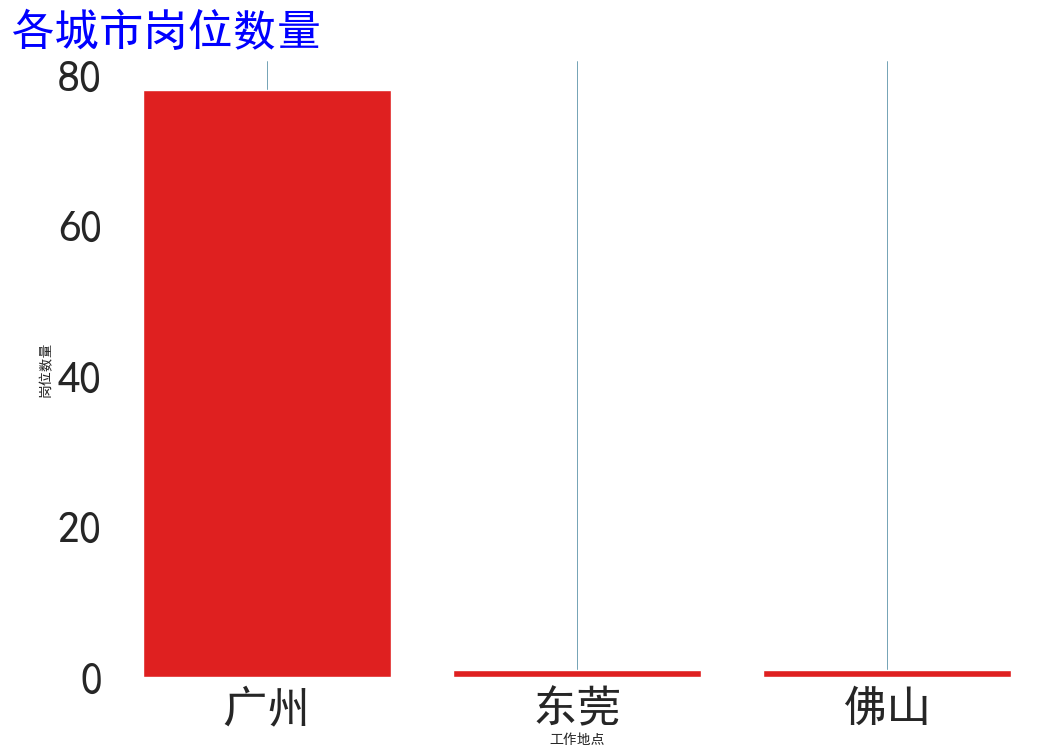

In [9]:
fig,ax = plt.subplots(figsize=(12,8))

sns.countplot(x='城市',order=df['城市'].value_counts().head(10).index,data=df,color='r')

plt.box(False)

fig.text(x=0.04,y=0.9,s='各城市岗位数量',fontsize=32,weight='bold',color='blue')

plt.tick_params(axis='both',which='major',labelsize=32)
ax.xaxis.grid(which='both',linewidth=0.5,color='#3c7f99')

plt.ylabel('岗位数量')
plt.xlabel('工作地点')

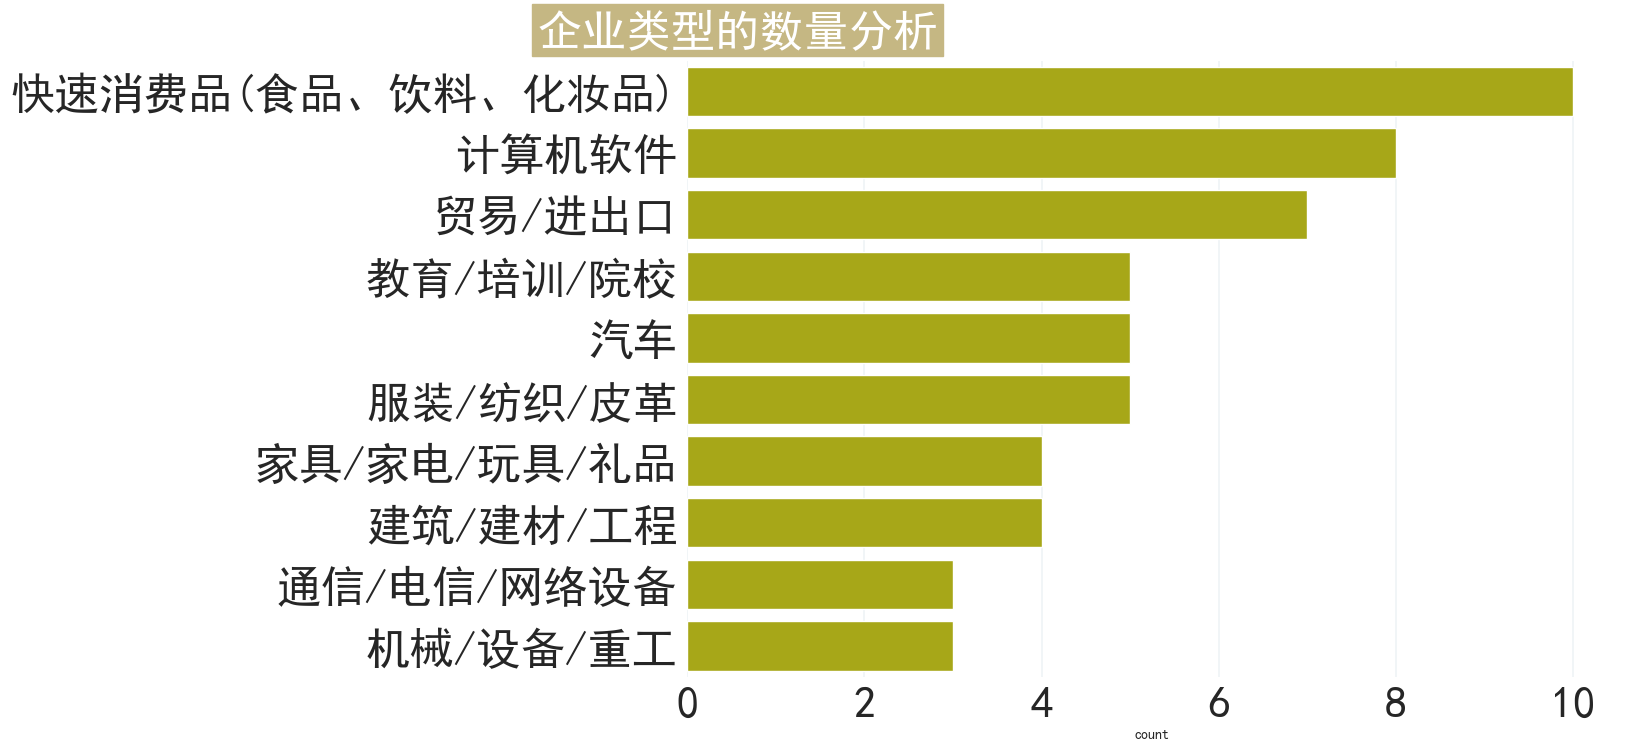

In [6]:
#企业类型的数量分析

industry_index=df['领域'].value_counts().head(10).index
industry = df.loc[df['领域'].isin(industry_index),'领域']

fig,ax = plt.subplots(figsize=(12,8))

sns.countplot(y=industry.values,order=industry_index,color='y')

plt.box(False)

fig.text(x=0,y=0.9,s='企业类型的数量分析',fontsize=32,weight='bold',color='w',backgroundcolor='#c5b783')

plt.tick_params(axis='both',which='major',labelsize=32)
ax.xaxis.grid(which='both',linewidth=0.1,color='#3c7f99')

In [ ]:
#学历要求与岗位的关系

education = df['学历要求'].value_counts()

y = education.values
y = y/sum(y) #归一化，不进行的话系统会自动进行

plt.figure(figsize = (10,10))
plt.title("学历要求",fontsize = 15)
patches,l_text,p_text = plt.pie(y, labels = education.index, autopct = "%.1f %%", colors = "bygr", startangle = 90)

for i in p_text: #通过返回值设置饼图内部字体
    i.set_size(15)
    i.set_color('w')

for i in l_text: #通过返回值设置饼图外部字体
    i.set_size(15)
    i.set_color('r')
    
plt.legend() #图例
plt.show()